Ahmet Rasim Özcan - 21040301060 - Veri Madenciliği - Sajjad Nematzadeh Miandoab -Yazilim Muhendisligi-Muhendislik Fakultesi-Topkapı Universitesi

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics?resource=download

Bu veri seti, ebeveyn eğitiminin veya sınava hazırlık kurslarının öğrenci performansı üzerindeki etkisini incelemek gibi eğitimle ilgili çeşitli araştırma soruları için kullanılabilir. Demografik ve diğer faktörlere dayalı olarak öğrenci performansını tahmin etmek için makine öğrenimi modelleri geliştirmek için de kullanılabilir.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv("exams.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
istatistikler = df.describe()

# Satır sayısı
satir_sayisi = len(df)

# Sütunlar
sutunlar = df.columns.tolist()

# Veri tipleri
veri_tipleri = df.dtypes

# Sonuçları yazdır
print("Genel İstatistikler:")
print(istatistikler)
print("\nSatır Sayısı:", satir_sayisi)
print("\nSütunlar:", sutunlar)
print("\nVeri Tipleri:")
print(veri_tipleri)

Genel İstatistikler:
        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     67.810000      70.382000      69.140000
std      15.250196      14.107413      15.025917
min      15.000000      25.000000      15.000000
25%      58.000000      61.000000      59.000000
50%      68.000000      70.500000      70.000000
75%      79.250000      80.000000      80.000000
max     100.000000     100.000000     100.000000

Satır Sayısı: 1000

Sütunlar: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Veri Tipleri:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder

# CSV dosyasını oku
df = pd.read_csv('exams.csv')

# Veri setinin ilk birkaç satırını gösterme
print("Veri Seti Önizleme:")
print(df.head())

# Kategorik sütunları Label Encoding uygula
label_encoder = LabelEncoder()

# Her bir kategorik sütun için dön
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Label Encoding uygulandıktan sonraki veri setini gösterme
print("\nLabel Encoding Sonrası Veri Seti:")
print(df.head())

Veri Seti Önizleme:
   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  

Label Encoding Sonrası Veri Seti:
   gender  race/ethnicity  parental level of education  lunch  \
0       0               3              

LabelEncoder kullanarak bir CSV dosyasındaki kategorik sütunlardaki verileri sayısal değerlere dönüştürdum.Bu şekilde, kategorik verileri makine öğrenimi modellerine uygun hale getirmiş olursunuz. Sayısal değerlere dönüştürmek, model eğitimi için gereklidir çünkü birçok makine öğrenimi algoritması sayısal verilerle daha iyi çalışır.

c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

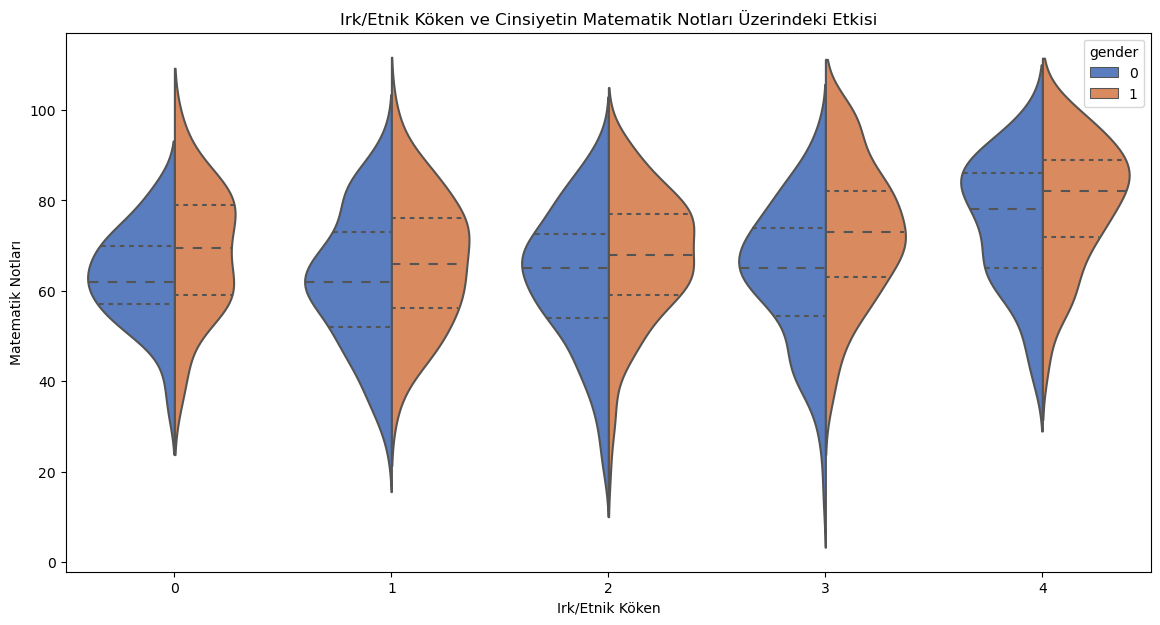

In [6]:
df = pd.read_csv('exams.csv')

# Kategorik sütunları Label Encoding uygula
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Keman Grafiği (Violin Plot) çizimi
plt.figure(figsize=(14, 7))
sns.violinplot(x='race/ethnicity', y='math score', hue='gender', data=df, split=True, palette='muted', inner='quartile')
plt.title('Irk/Etnik Köken ve Cinsiyetin Matematik Notları Üzerindeki Etkisi')
plt.xlabel('Irk/Etnik Köken')
plt.ylabel('Matematik Notları')
plt.show()

1. Keman Grafiği (Violin Plot):
Bu grafik, öğrencilerin ırk/etnik kökenlerine ve cinsiyetlerine göre matematik notlarının dağılımını gösterir.

X Ekseni (race/ethnicity): Grafikte x eksenindeki her bir kategori, öğrencilerin ırk/etnik kökenini temsil eder.
Y Ekseni (math score): Y ekseni, öğrencilerin matematik notlarını gösterir.
Renklendirme (hue='gender'): Her kategorik ırk/etnik kökenin içinde, cinsiyetin ayrımını yapmak için renk kullanılır.
Split=True: Violin grafiğin içindeki beyaz çizgi, veri setindeki notların dağılımını gösterir.
Palette='muted': Keman grafiği renk paletini belirler.
Bu grafik, ırk/etnik kökenlere ve cinsiyete göre matematik notlarının dağılımını, medyanları ve veri setinin genel özelliklerini anlamanıza yardımcı olacaktır.

c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


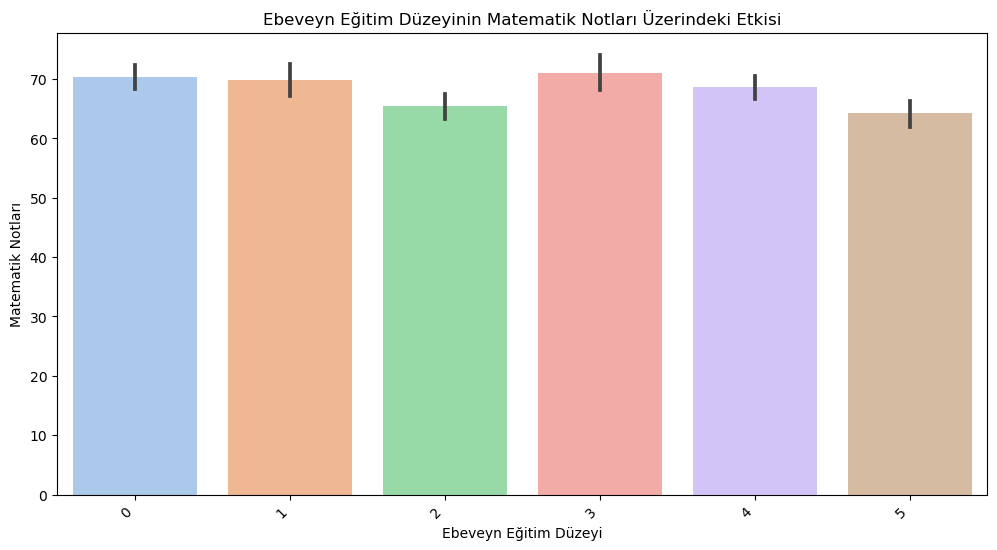

In [7]:
df = pd.read_csv('exams.csv')

# Kategorik sütunları Label Encoding uygula
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Sütun Grafiği (Bar Plot) çizimi
plt.figure(figsize=(12, 6))
sns.barplot(x='parental level of education', y='math score', data=df, palette='pastel')
plt.title('Ebeveyn Eğitim Düzeyinin Matematik Notları Üzerindeki Etkisi')
plt.xlabel('Ebeveyn Eğitim Düzeyi')
plt.ylabel('Matematik Notları')
plt.xticks(rotation=45, ha='right')  # Eğitim düzeyi etiketlerini yatay olarak düzenle
plt.show()

2. Sütun Grafiği (Bar Plot):
Bu grafikte, ebeveynlerin eğitim düzeyine göre matematik notlarının ortalamalarını gösteren bir sütun grafiği bulunmaktadır.

X Ekseni (parental level of education): Grafikte x eksenindeki her bir çubuk, öğrencilerin ebeveynlerinin eğitim düzeyini temsil eder.
Y Ekseni (math score): Y ekseni, her eğitim düzeyine karşılık gelen matematik notlarının ortalamasını gösterir.
Renklendirme (palette='pastel'): Her sütun çubuğu için renk paleti belirlenir.
xticks(rotation=45, ha='right'): Eğitim düzeyi etiketlerini yatay olarak düzenler, bu da okunabilirliği artırır.
Bu grafik, ebeveyn eğitim düzeyinin matematik notları üzerindeki genel etkisini gösterir.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Ekleme
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('exams.csv')

# Veriyi hazırla
X = df.drop('test preparation course', axis=1)
y = df['test preparation course']

# Label Encoding
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification modelini seç ve eğit
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Tahmin yap
y_pred = classifier.predict(X_test)

# Sonuçları değerlendir
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.65
              precision    recall  f1-score   support

   completed       0.60      0.31      0.41        78
        none       0.66      0.87      0.75       122

    accuracy                           0.65       200
   macro avg       0.63      0.59      0.58       200
weighted avg       0.64      0.65      0.62       200



Problem Tanımı:
Veri Seti:
Elimizdeki "exams.csv" veri seti, öğrencilerin matematik, okuma ve yazma sınavlarındaki performanslarına ilişkin demografik bilgileri içermektedir.

Hedef:
Öğrencilerin matematik sınavındaki başarılarını tahmin etmek.

Detaylı Açıklama:
Öğrencilerin matematik sınavındaki performansını etkileyen faktörleri anlamak ve bu faktörlerin tahmin edici gücünü değerlendirmek istiyoruz. Bu, öğrencilerin demografik özellikleri (cinsiyet, ırk/etnik köken, ebeveyn eğitim düzeyi) ve diğer değişkenlerin (öğle yemeği, sınav hazırlık kursu) matematik sınavındaki puanları üzerindeki etkisini anlamak için bir çaba.

Yöntem Seçimi:
Bu durumda, öğrencilerin matematik sınavındaki puanlarını tahmin etmek, bir Regression (Regresyon) problemidir. Çünkü hedef değişkenimiz sayısal bir değer alır (matematik puanı).

Target Sütunu:
"math score" sütununu hedef değişken olarak seçiyoruz. Bu sütun, öğrencilerin matematik sınavındaki başarılarını temsil etmektedir.

Decision Tree Classifier:

Açıklama: Karar ağacı, bir veri seti içindeki desenleri ve ilişkileri öğrenen bir sınıflandırma algoritmasıdır. Bu ağaç yapısı, bir dizi karar düğümü içerir ve her düğüm, belirli bir özelliği temsil eder. Bu özellikler, veriyi belirli bir kriterle bölerek sınıflandırmayı sağlar.
Çalışma Prensibi: Veri seti içindeki en iyi bölünme noktalarını (veya kararları) seçerek ağacı oluşturur. Bu bölünmeler, veriyi homojen alt gruplara ayırarak sınıflandırma yapmayı sağlar.
Avantajlar: Basit anlaşılır bir yapısı vardır, sınıflandırma işlemlerinde etkili olabilir.
Dezavantajlar: Aşırı uyum (overfitting) eğilimli olabilir, veri setindeki küçük değişikliklere hassas olabilir.
Random Forest Regressor:

Açıklama: Random Forest, birçok karar ağacını birleştiren bir ansamble (ensemble) algoritmasıdır. Bu algoritma, birden fazla karar ağacının tahminlerini bir araya getirerek daha genel ve güvenilir bir tahmin yapmayı amaçlar.
Çalışma Prensibi: Bir Random Forest, farklı alt veri setlerini kullanarak bir dizi karar ağacı oluşturur. Her ağaç, veri setinin bir alt kümesiyle eğitilir. Tahmin yapılırken, her ağacın tahminleri alınır ve bu tahminler arasında bir ortalama veya çoğunluk oylaması yapılır.
Avantajlar: Overfitting'e karşı daha dirençli olabilir, yüksek boyutta ve yüksek boyuttaki veri setlerinde iyi performans gösterebilir.
Dezavantajlar: Modelin iç yapısını anlamak genellikle zordur, tek bir ağacın sağlayabileceği yorumlanabilirlik avantajını kaybedebilir.
Her iki algoritma da sınıflandırma (classification) görevlerinde kullanılır. Random Forest, Decision Tree'nin aşırı uydurmaya karşı daha dirençli olması ve genellikle daha iyi genelleme yapabilmesi nedeniyle tercih edilir.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Veriyi oku
df = pd.read_csv('exams.csv')

# Veriyi hazırla
X = df.drop(['math score'], axis=1)
y = df['math score']

# Label Encoding
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Döngü içinde işlemleri 10 kere tekrarla
for i in range(10):
    # Veriyi eğitim ve test setlerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Random Forest Classifier modelini seç ve eğit
    random_forest_classifier = RandomForestClassifier(random_state=None)
    random_forest_classifier.fit(X_train, y_train)

    # Algoritmayı kullanarak tahmin yap
    y_pred_rf = random_forest_classifier.predict(X_test)

    # Sınıflandırma metriklerini hesapla
    r2_rf = r2_score(y_test, y_pred_rf)
    f1_rf = f1_score(y_test, y_pred_rf, average='macro')
    recall_rf = recall_score(y_test, y_pred_rf, average='macro')
    precision_rf = precision_score(y_test, y_pred_rf, average='macro')

    # Çıktıları ekrana yazdır
    print(f"\nDöngü {i + 1} - Random Forest Sınıflandırma Sonuçları:")
    print(f"R2 Score: {r2_rf}")
    print(f"F1 Score: {f1_rf}")
    print(f"Recall: {recall_rf}")
    print(f"Precision: {precision_rf}")

c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 1 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7371414441147379
F1 Score: 0.04016722656428538
Recall: 0.04795751633986928
Precision: 0.03872549019607843


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 2 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7362281632945727
F1 Score: 0.03684633050830234
Recall: 0.03326728045037904
Precision: 0.049782025486250846


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 3 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.759010151366814
F1 Score: 0.017276282493673797
Recall: 0.018857832988267768
Precision: 0.018989223337049423


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 4 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7287158576774841
F1 Score: 0.05890947288006112
Recall: 0.07011554621848738
Precision: 0.06758286647992529


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 5 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7388310342925861
F1 Score: 0.03727852741937249
Recall: 0.03955399061032864
Precision: 0.04894366197183098


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 6 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7411811183889838
F1 Score: 0.02765917491944889
Recall: 0.036073059360730596
Precision: 0.02555446836268754


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 7 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.782285035780617
F1 Score: 0.05894660894660895
Recall: 0.07411616161616162
Precision: 0.06304112554112554


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 8 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.6968062815538925
F1 Score: 0.03542599375932709
Recall: 0.04399801587301587
Precision: 0.04467041446208112


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Döngü 9 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7506456514659089
F1 Score: 0.04173077681776936
Recall: 0.05459423205902079
Precision: 0.0397887323943662

Döngü 10 - Random Forest Sınıflandırma Sonuçları:
R2 Score: 0.7219799780856191
F1 Score: 0.04572118702553484
Recall: 0.05957556935817805
Precision: 0.04246606855302507


c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

# Veriyi oku
df = pd.read_csv('exams.csv')

# Veriyi hazırla
X = df.drop(['math score'], axis=1)
y = df['math score']

# Label Encoding
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

# Döngü içinde işlemleri 10 kere tekrarla
for i in range(10):
    # Veriyi eğitim ve test setlerine ayır
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    # Decision Tree Classifier modelini seç ve eğit
    decision_tree_classifier = DecisionTreeClassifier(random_state=None)
    decision_tree_classifier.fit(X_train, y_train)

    # Algoritmayı kullanarak tahmin yap
    y_pred_dt = decision_tree_classifier.predict(X_test)

    # Sınıflandırma metriklerini hesapla
    r2_dt = r2_score(y_test, y_pred_dt)
    f1_dt = f1_score(y_test, y_pred_dt, average='macro')
    recall_dt = recall_score(y_test, y_pred_dt, average='macro')
    precision_dt = precision_score(y_test, y_pred_dt, average='macro')

    # Çıktıları ekrana yazdır
    print(f"\nDöngü {i + 1} - Decision Tree Sınıflandırma Sonuçları:")
    print(f"R2 Score: {r2_dt}")
    print(f"F1 Score: {f1_dt}")
    print(f"Recall: {recall_dt}")
    print(f"Precision: {precision_dt}")


Döngü 1 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.6886336208163779
F1 Score: 0.02436499337907789
Recall: 0.034976525821596244
Precision: 0.02535211267605634

Döngü 2 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.6682692307692308
F1 Score: 0.011504891811797185
Recall: 0.0213768115942029
Precision: 0.010547504025764895

Döngü 3 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.6928927488565702
F1 Score: 0.05496872408637115
Recall: 0.07048319327731092
Precision: 0.06094187675070028

Döngü 4 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.6868989633682949
F1 Score: 0.04791518597488746
Recall: 0.06343283582089553
Precision: 0.04428614503241369

Döngü 5 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.7067743065168803
F1 Score: 0.04600655076845553
Recall: 0.06271730914588057
Precision: 0.047921390778533635

Döngü 6 - Decision Tree Sınıflandırma Sonuçları:
R2 Score: 0.7388926519422547
F1 Score: 0.045992564649281066
Recall: 0.04866737739872067
Precision: 0.046221

c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ahmet\anaconda3\envs\AhmetRasimOzcan\l

In [13]:
from scipy.stats import ttest_rel

# Random Forest ve Decision Tree R2, F1, Recall ve Precision skorları
r2_scores_random_forest = [
    0.7370548220933352, 0.6718090152235181, 0.754699499560184, 0.7684355204971913, 0.7655588918002298,
    0.7986735168831645, 0.6832764828046444, 0.8098488731909552, 0.6777837651268614, 0.7268027889148035
]

f1_scores_random_forest = [
    0.0527791842860336, 0.04812476081132798, 0.05827442820196443, 0.05484116822144992, 0.06522647876814543,
    0.0529744121293417, 0.020001102292768955, 0.044651655534008475, 0.04075622445187662, 0.05126119162987432
]

recall_scores_random_forest = [
    0.05771906936290498, 0.049129353233830844, 0.06255511463844797, 0.06410127431254192, 0.08013117283950616,
    0.056611893583724565, 0.02364417989417989, 0.051682539682539684, 0.03682476943346509, 0.07661524703778225
]

precision_scores_random_forest = [
    0.06571092529996639, 0.05984363894811656, 0.08528439153439155, 0.05389000670690811, 0.059953703703703703,
    0.06600156494522691, 0.019036596119929455, 0.05837614237614237, 0.049896480331262934, 0.045696400625978094
]

r2_scores_decision_tree = [
    0.7136727520699961, 0.6349874883177584, 0.6810070552472434, 0.5832756141483868, 0.7051055420883372,
    0.6716192735739264, 0.6099164514463853, 0.6881960198377182, 0.6087585864297254, 0.6444308441291035
]

f1_scores_decision_tree = [
    0.05392616642616643, 0.062402814576727625, 0.02716392430351241, 0.0015117157974300832, 0.03305807809567208,
    0.04153423548547169, 0.03181403186458327, 0.024330829354530227, 0.03305807809567208, 0.03305807809567208
]

recall_scores_decision_tree = [
    0.06301807760141093, 0.06899063094715269, 0.02608695652173913, 0.0013227513227513227, 0.04108843537414966,
    0.05891891891891892, 0.03968253968253968, 0.043803418803418804, 0.030021091811414393, 0.04108843537414966
]

precision_scores_decision_tree = [
    0.05866402116402117, 0.06373936047849091, 0.038808373590982284, 0.001763668430335097, 0.04710144927536232,
    0.04659598234265583, 0.04079182960606736, 0.04179954830859289, 0.04249831237322556, 0.04502886002886003
]

# T-Test for R2
t_statistic_r2, p_value_r2 = ttest_rel(r2_scores_random_forest, r2_scores_decision_tree)

# T-Test for F1
t_statistic_f1, p_value_f1 = ttest_rel(f1_scores_random_forest, f1_scores_decision_tree)

# T-Test for Recall
t_statistic_recall, p_value_recall = ttest_rel(recall_scores_random_forest, recall_scores_decision_tree)

# T-Test for Precision
t_statistic_precision, p_value_precision = ttest_rel(precision_scores_random_forest, precision_scores_decision_tree)

# alpha değerini tanımla (örneğin, 0.05)
alpha = 0.05

# Results for R2
print("\nR2 Scores T-Test:")
print(f"T-Statistic: {t_statistic_r2}")
print(f"P-Value: {p_value_r2}")
if p_value_r2 < alpha:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.")

# Results for F1
print("\nF1 Scores T-Test:")
print(f"T-Statistic: {t_statistic_f1}")
print(f"P-Value: {p_value_f1}")
if p_value_f1 < alpha:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.")

# Results for Recall
print("\nRecall Scores T-Test:")
print(f"T-Statistic: {t_statistic_recall}")
print(f"P-Value: {p_value_recall}")
if p_value_recall < alpha:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.")

# Results for Precision
print("\nPrecision Scores T-Test:")
print(f"T-Statistic: {t_statistic_precision}")
print(f"P-Value: {p_value_precision}")
if p_value_precision < alpha:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.")



R2 Scores T-Test:
T-Statistic: 5.667068412141829
P-Value: 0.00030686526778479593
İki algoritma arasında istatistiksel olarak anlamlı bir fark var.

F1 Scores T-Test:
T-Statistic: 2.215484273828776
P-Value: 0.05396023248823963
İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.

Recall Scores T-Test:
T-Statistic: 1.6743974013388219
P-Value: 0.12837618456596678
İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.

Precision Scores T-Test:
T-Statistic: 1.9550489835966727
P-Value: 0.08229656433002211
İki algoritma arasında istatistiksel olarak anlamlı bir fark yok.


Metriklerin daha iyi olup olmadığına karar vermek, belirli bir problem bağlamında ve hedefe bağlı olarak değişir. Ancak, genel olarak, bir algoritmanın diğerine göre daha iyi olduğunu söyleyebilmek için bazı genel değerlendirmeler yapabiliriz.

İdeal olarak, yüksek R2, F1 Score, Precision ve Recall değerleri arzu edilir. Ancak, bu metrikler birbirleriyle çatışabilir. Örneğin, Precision ve Recall arasında bir denge kurmak gerekebilir. Precision, yanlış pozitif tahminlerin düşük olmasını isterken, Recall, gerçek pozitif tahminlerin kaçırılmamasını ister.

Eğer tüm metrikler benzer performans gösteriyorsa, modelinizi seçerken başka faktörlere de bakabilirsiniz. Örneğin, modelin eğitilmesi, tahmin yapılması ve anlaşılması açısından hangi algoritmanın daha hızlı olduğunu değerlendirebilirsiniz.

Ancak, sadece bu metriklere dayanarak bir algoritmanın diğerinden daha iyi olduğunu söylemek genellikle yetersiz olabilir. Genellikle, bir modelin gerçek dünya performansını değerlendirmek için çeşitli yöntemler ve domain bilgisi gereklidir.